Average time taken (seconds) for each thread configuration:
  Threads: 1, Time: 4.0120
  Threads: 2, Time: 8.7514
  Threads: 3, Time: 17.4895
  Threads: 4, Time: 13.4992
  Threads: 5, Time: 11.0549
  Threads: 6, Time: 12.8562
  Threads: 7, Time: 15.3029
  Threads: 8, Time: 17.6429


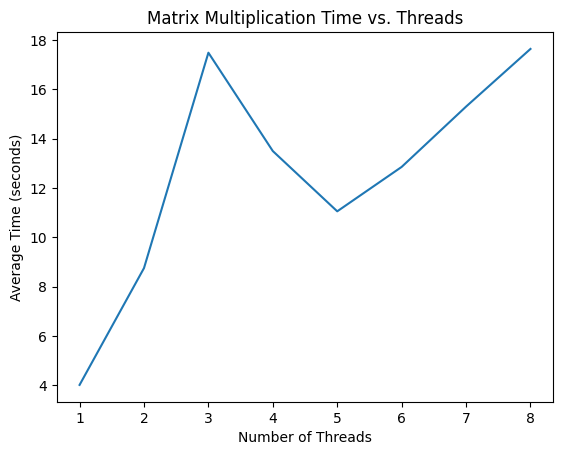

In [1]:
import numpy as np
from time import time
import threading

# Matrix size
N = 1000

# Number of random matrices
num_matrices = 100

# Function to generate a random matrix
def generate_random_matrix():
  return np.random.rand(N, N).astype(np.float32)  # Adjust data type if needed

# Function to perform matrix multiplication (single thread)
def matrix_multiply(A, B):
  return np.dot(A, B)

# Function for threaded matrix multiplication
def threaded_matrix_multiply(A, B, num_threads):
  results = []
  threads = []

  def worker(i, A_i, B):
    result = matrix_multiply(A_i, B)
    results.append(result)

  # Create and start threads
  for i in range(num_threads):
    A_i = generate_random_matrix()  # Generate matrix for each thread
    thread = threading.Thread(target=worker, args=(i, A_i, B))
    threads.append(thread)
    thread.start()

  # Wait for threads to finish
  for thread in threads:
    thread.join()

  return results

# Main experiment loop
threads_list = [1, 2, 3, 4, 5, 6, 7, 8]  # Number of threads to test
times = []

for num_threads in threads_list:
  start_time = time()
  # Generate constant matrix (outside loop for efficiency)
  constant_matrix = generate_random_matrix()

  # Perform threaded multiplication for 100 matrices
  for _ in range(num_matrices):
    threaded_matrix_multiply(generate_random_matrix(), constant_matrix, num_threads)

  end_time = time()
  total_time = end_time - start_time
  times.append(total_time)

print("Average time taken (seconds) for each thread configuration:")
for i, num_threads in enumerate(threads_list):
  print(f"  Threads: {num_threads}, Time: {times[i]:.4f}")

# Optional: Plot the results (requires additional libraries like matplotlib)
import matplotlib.pyplot as plt
plt.plot(threads_list, times)
plt.xlabel("Number of Threads")
plt.ylabel("Average Time (seconds)")
plt.title("Matrix Multiplication Time vs. Threads")
plt.show()
